# Продажа квартир в Санкт-Петербурге

**Описание проекта**

В исходных данных сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Основная задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Необходимо изучить, как быстро продаются квартиры, какие факторы влияют на стоимость объекта, в частности, зависит ли цена от площади, кол-ва комнат, этажа или дата размещения. Также нужно найти среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений, и описать, как стоимость объекта зависит от расстояния до центра города.

**Описание данных**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
* balcony — число балконов;
* ceiling_height — высота потолков (м);
* cityCenters_nearest — расстояние до центра города (м);
* days_exposition — сколько дней было размещено объявление (от публикации до снятия);
* first_day_exposition — дата публикации;
* floor — этаж;
* floors_total — всего этажей в доме;
* is_apartment — апартаменты (булев тип);
* kitchen_area — площадь кухни в квадратных метрах (м²);
* last_price — цена на момент снятия с публикации;
* living_area — жилая площадь в квадратных метрах (м²);
* locality_name — название населённого пункта;
* open_plan — свободная планировка (булев тип);
* parks_around3000 — число парков в радиусе 3 км;
* parks_nearest — расстояние до ближайшего парка (м);
* ponds_around3000 — число водоёмов в радиусе 3 км;
* ponds_nearest — расстояние до ближайшего водоёма (м);
* rooms — число комнат;
* studio — квартира-студия (булев тип);
* total_area — общая площадь квартиры в квадратных метрах (м²);
* total_images — число фотографий квартиры в объявлении.

## Общая информация о данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем данные из csv-файла и сохраним в переменную `data`:

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

Выведем первые 10 строчек датафрейма `data` на экран:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода `info()`:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистрограммы по каждому столбцу:

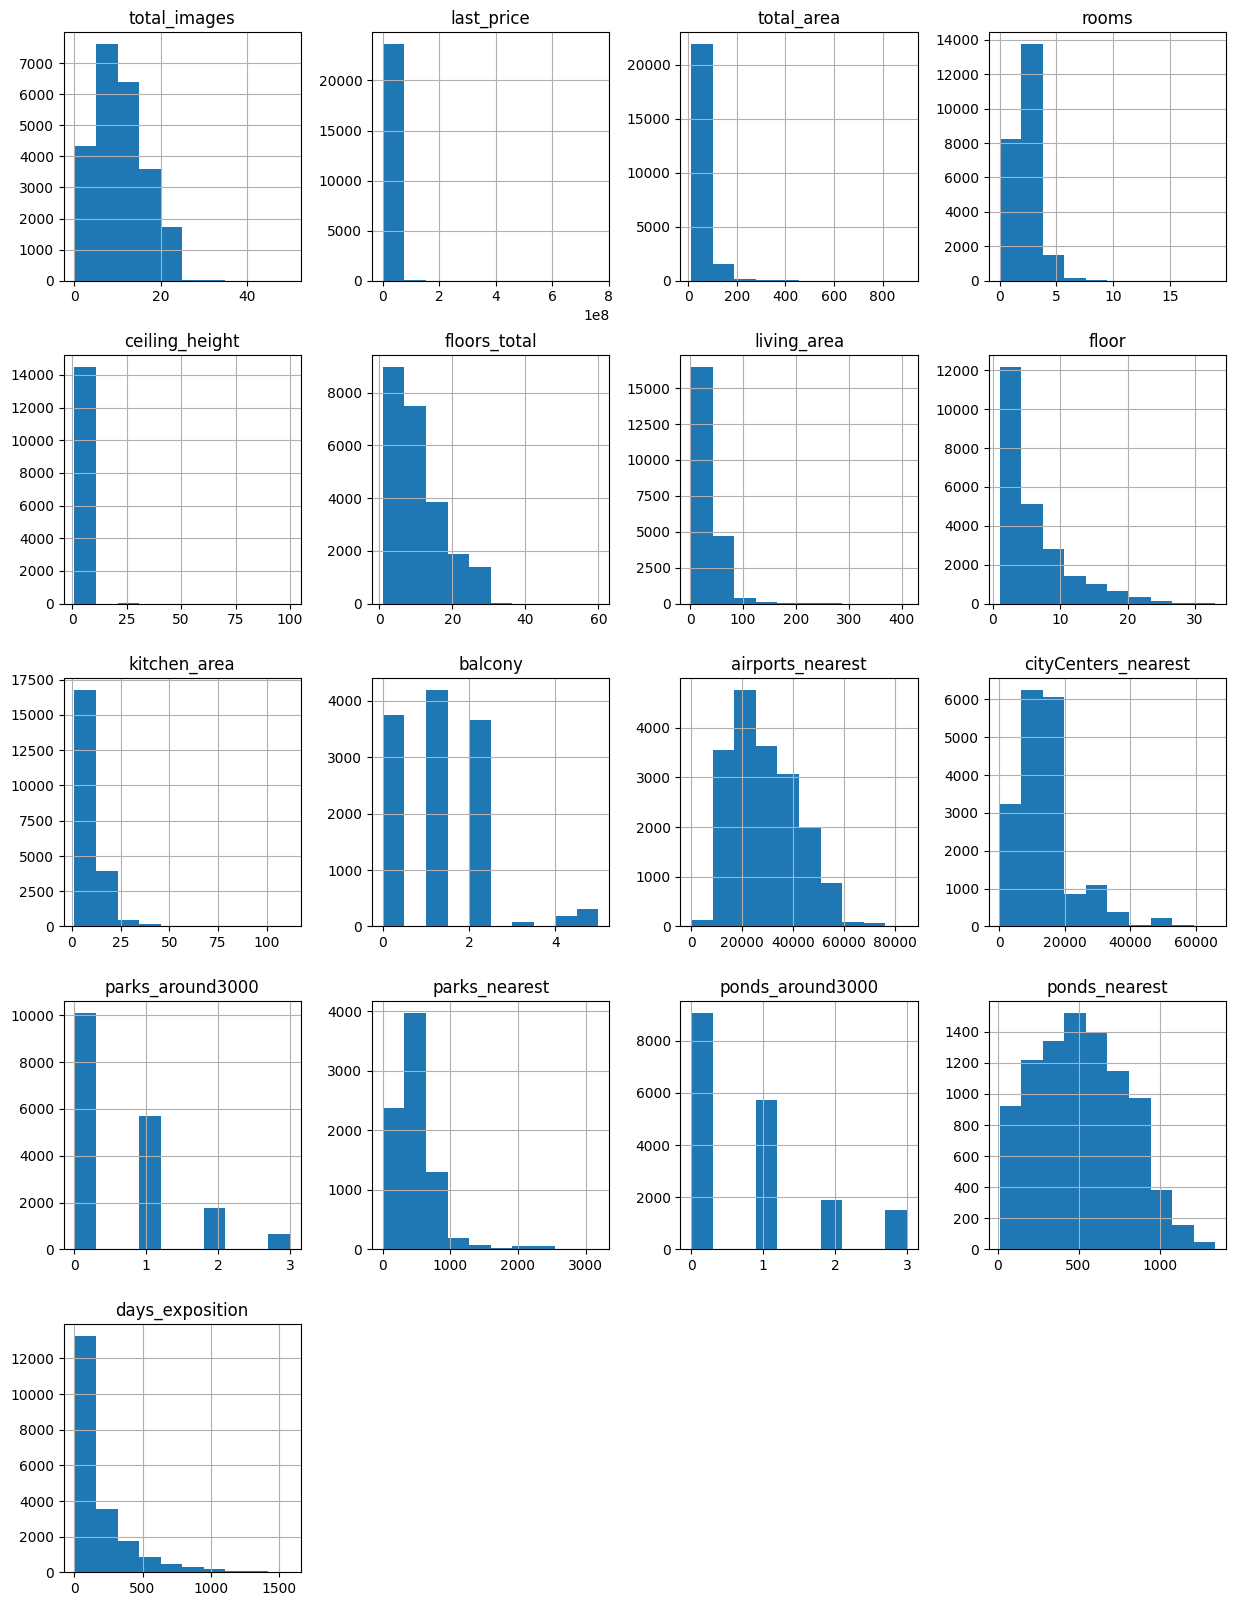

In [5]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:**
после предварительного знакомства с датасетом, выявлено следующее:
1. в столбцах `first_day_exposition`, `is_apartment` неверный тип данных - object вместо bool, в столбцах `floors_total`, `balcony` тип даных float допустим, но его лучше заменить на int;
2. во многих столбцах пропущены значения - по каждому столбцу необходимо пройтись отдельно;
3. в некоторых столбцах, таких как, `ceiling_height` можно увидить аномальные значения, которые не соответствуют действительности - необходимо рассмотреть их более детально.

## Предобработка данных

### Поиск пропущенных значений

Выведем количество пропущенных значений для каждого столбца:

In [6]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


Рассмотрим пропуски в столбце `ceiling_height`:

Минимальная высота потолков в России принята 2.4 метра, а максимальная до 8 метров.


Найдем все значения с высотой потолков больше 20 м:

In [7]:
data.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Вероятно, в этих данных допущены опечатки - значение 25 на самом деле должно быть 2.5 и т.д.

Однако, среди этих значений есть значения 22.6 и 100.0. Это аномалии, и к ним невозможно применить аналогичное исправление, так как высота потолков 2.26 и 10.0 м не может быть.

Таким образом, применим фильтр, изменяющий значения в 10 раз от 24 до 32 метров:

In [8]:
data.update(data[(data['ceiling_height'] >= 24) & (data['ceiling_height'] <= 32)]['ceiling_height'] / 10)

Избавимся от оставшихся пропусков и аномальных значением, удалив все значения, не входящие в диапазно от 2.4 до 8 метров включительно:

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
data = data[(data['ceiling_height'].isna()) | ((data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 8))]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23667,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23668,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23669,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23670,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Рассмотрим пропуски в столбцах `floors_total` и `loсality_name`:

Посчитаем кол-во пропусков в процентах. Так как пропуски составляют меньше 5%, то удаление этих строк координально не исказит результаты исследования.

In [11]:
data.isna().mean()*100

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.363298
living_area,8.026360
floor,0.000000
is_apartment,88.298412


In [12]:
data = (
    data
    .dropna(subset=['floors_total', 'locality_name'])
    .reset_index(drop=True)
)

Рассмотрим столбец `living_area`:

Найдем коэффициент корреляции жилой площади и общей площади:

In [13]:
data['living_area'].corr(data['total_area'])

0.9397992675485527

Так как прослеживается очень сильная взаимосвязь, заменим пропуски, умножив общую площадь на медианное отношение жилой площади к общей площади:

In [14]:
data['living_area'] = data['living_area'].fillna(((data['living_area'] / data['total_area']).median() * data['total_area']).round(0))

Рассмотрим столбец `kitchen_area`:

Аналогично найдем коэффициент корреляции площади кухни и общей площади, и, при наличии связи, умножим медианную зависимость площади кухни от общей площади на общую площадь:

In [15]:
data['kitchen_area'].corr(data['total_area'])

0.6092650410770288

In [16]:
data['kitchen_area'] = data['kitchen_area'].fillna(((data['kitchen_area'] / data['total_area']).median() * data['total_area']).round(0))

Рассмотрим столбец `balcony`:

Наличие балкона - обязательный пункт к заполнению в объявлении, поэтому можно предположить, что отстутсвие в датафрейме информации о наличии балкона подразумевает его отсутствии, а значит допустимо заменить пропуски нулем.

In [17]:
data['balcony'] = data['balcony'].fillna(0.0)

Рассмотрим столбец `days_exposition`:

Пропуски в этом столбце следует оставить, так как можно предположить, что это активные объявления.

В оставшихся столбцах невозможно заполнить пропуски, не исказив данные, так как нельзя выявить какую-либо зависимость о расстоянии до аэропорта, водоемов и парков.

Однако пропуски содержатся в большом кол-ве строк, поэтому удалять их из датафрейма нельзя, а значит наилучшим решением будет  оставить пропуски.

### Замена типов данных

Рассмотрим столбец `first_day_exposition`:

В столбце хранится дата размещения объявления, однако тип данных - object.

Преобразуем столбец `first_day_exposition` к типу datetime.

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Рассмотрим столбец `is_apartment`:

В столбце хранятся значения True и False, однако тип данных - object.

Преобразуем столбец `is_apartment` к типу bool.

In [19]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Рассмотрим столбцы `floors_total` и `balcony`:

В этих столбцах хранятся данные типа float, однако в этом нет нужды, так как значения априори - целочисленные, поэтому логично преобразовать эти столбцы к типу int во избежание ошибок и некорректной работы при последующем анализе.

In [20]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

### Поиск и устранение дубликатов

Проверим наличие явных дубликатов:

In [21]:
data.duplicated().sum()

0

Найдем неявные дубликаты в столбце `locality_name`:

Для начала выведем все уникальные значения, затем заменим букву "ё" на букву "е", а также избавимся от приставок "деревня", "поселок" и т.д., оставив только наименование населенного пункта.

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [23]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [24]:
dub = ['поселок ', 'городской поселок ', 'деревня ', 'поселок городского типа ', 'садовое товарищество ', 'село ', 'поселок городского типа ', 'поселок станции ', 'городской ', 'городского типа ', 'станции ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной станции ', 'коттеджный ', 'пансионат ', 'при железнодорожной ', ]
for i in dub:
    data['locality_name'] = data['locality_name'].str.replace(i, '')

Проверим, успешно ли применился цикл:

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Добавление новых столбцов

Найдем цену за один квадратный метр и добавим в новый столбец `price_per_square_meter`:

In [26]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)

Добавим день недели публикации в новый столбец `weekday`:

In [27]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Добавим месяц публикации в новый столбец `month`:

In [28]:
data['month'] = data['first_day_exposition'].dt.month

Добавим год публикации в новый столбец `year`:

In [29]:
data['year'] = data['first_day_exposition'].dt.year

Сгруппируем этажи квартиры на типы и добавим в новый столбец  `floors_type`:

In [30]:
def categorize_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

In [31]:
data['floors_type'] = data.apply(categorize_floor_type, axis=1)

Переведем расстояние до центра города в столбце `cityCenters_nearest` в километры и добавим в новый столбец `distance_to_citycenter`:

In [32]:
data['distance_to_citycenter'] = data['cityCenters_nearest'] // 1000

Проверим, успешно ли добавились новые столбцы:

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Устранение аномалий

Рассмотрим столбец `ceiling_height`:

In [34]:
data['ceiling_height'].describe()

,ceiling_height
count,23538.000000
mean,2.698070
std,0.228818
min,2.400000
25%,2.600000
50%,2.650000
75%,2.700000
max,8.000000


Построим гистограмму:

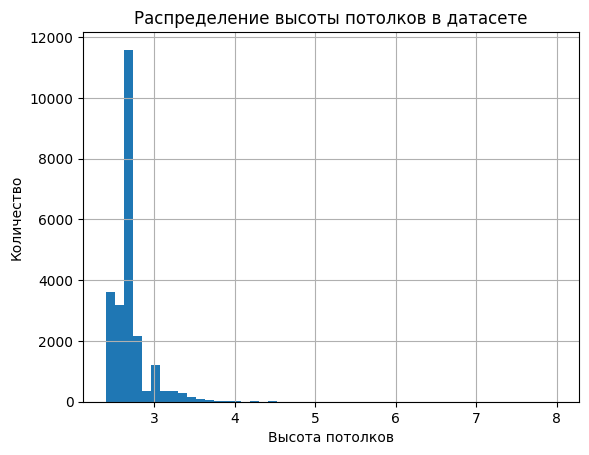

In [35]:
data['ceiling_height'].hist(bins=50)
plt.title('Распределение высоты потолков в датасете')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.show()

Построим диаграмму размаха:

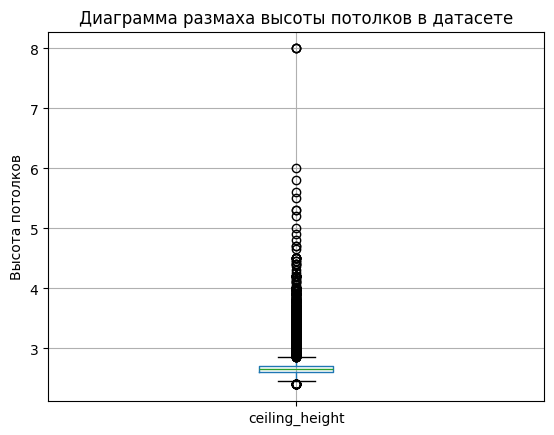

In [36]:
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха высоты потолков в датасете')
plt.ylabel('Высота потолков')
plt.show()

Анализируя гистограмму можно увидеть, что значения высоты потолков больше 3.5 метров можно отбросить, тогда как по диаграмме размаха видно, что граница нормальных значений - ниже 3 м.

Однако, в данном случае диаграмма размаха - это довольно грубый способ устранения аномалия, так как в данных было много пропусков, которые мы заменили медианным значением.

В реальности, высота потолков около 3 м часто встречается, поэтому удалим значения выше 4 метров.


In [37]:
data = data[data.ceiling_height < 4]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23446,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23447,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23448,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23449,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


Повторно построим гистограмму и диаграмму размаха для проверки очищенных данных:

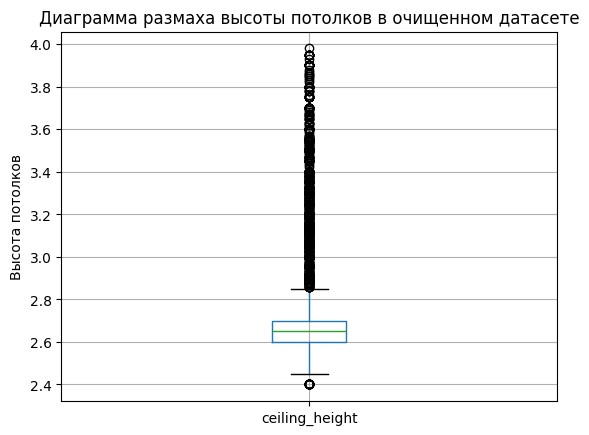

In [38]:
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха высоты потолков в очищенном датасете')
plt.ylabel('Высота потолков')
plt.show()

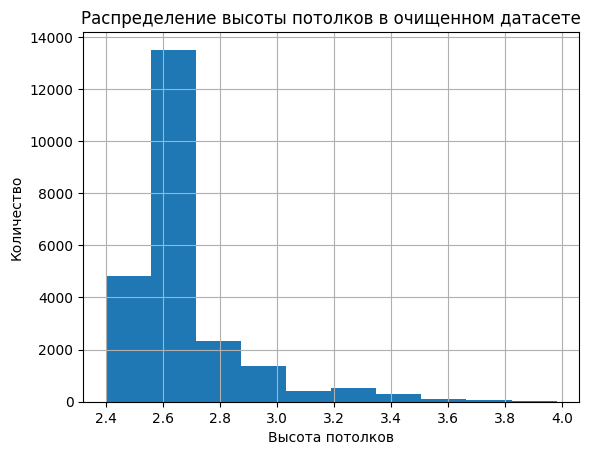

In [39]:
data['ceiling_height'].hist(bins=10)
plt.title('Распределение высоты потолков в очищенном датасете')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.show()

Рассмотрим столбец `total_area`:

In [40]:
data['total_area'].describe()

,total_area
count,23451.000000
mean,60.067802
std,34.883673
min,12.000000
25%,40.000000
50%,52.000000
75%,69.400000
max,900.000000


Построим гистограмму и диаграмму размаха:

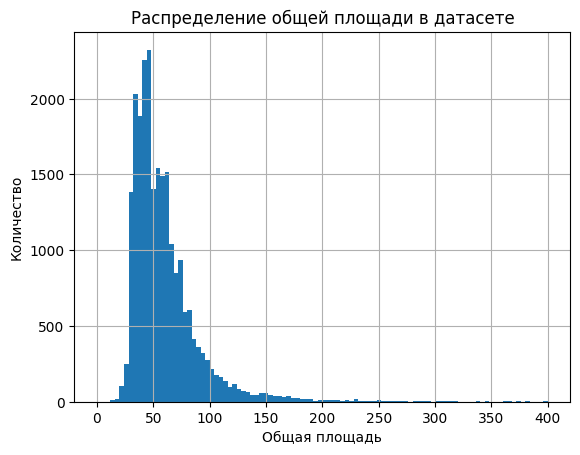

In [41]:
data['total_area'].hist(bins=100, range=(0, 400))
plt.title('Распределение общей площади в датасете')
plt.xlabel('Общая площадь')
plt.ylabel('Количество')
plt.show()

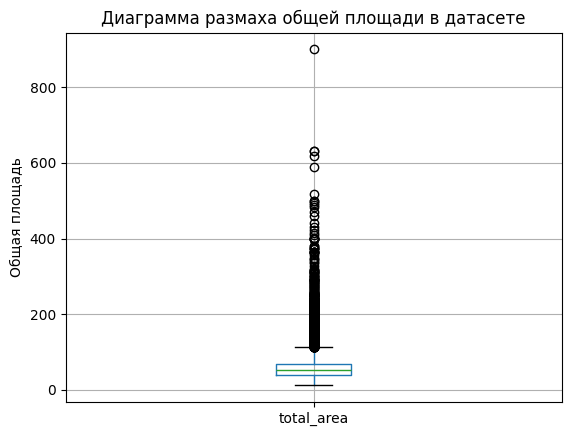

In [42]:
data.boxplot(column='total_area')
plt.title('Диаграмма размаха общей площади в датасете')
plt.ylabel('Общая площадь')
plt.show()

In [43]:
total_rows = data['total_area'].count()
print(f'Всего строк: {total_rows}')
big_area = data[data['total_area'] > 250]['total_area'].count()
print(f'Всего квартир больше 250 метров: {big_area}')
print(f'Отношение, %: {(big_area / total_rows) * 100}')

Всего строк: 23451
Всего квартир больше 250 метров: 100
Отношение, %: 0.42642104814293635


Судя по гистограмме, квартиры площадью от 250 метров едва заметны. Диаграмма размаха считает значения выше примерно 110 метров - аномальными.

Так как отношение составляет меньше 5%, то можно избавиться от аномальных значений.

Отфильтруем значения:

In [44]:
data = data[data.total_area < 250]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23342,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23343,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23344,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23345,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


Построим гистограмму и диаграмму размаха по отфильтрованным значениям:

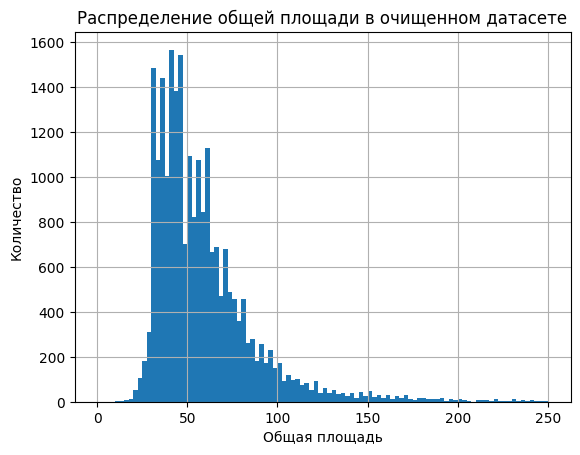

In [45]:
data['total_area'].hist(bins=100, range=(0, 250))
plt.title('Распределение общей площади в очищенном датасете')
plt.xlabel('Общая площадь')
plt.ylabel('Количество')
plt.show()

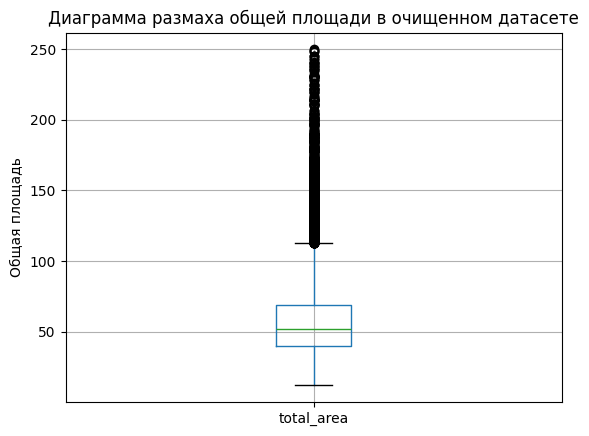

In [46]:
data.boxplot(column='total_area')
plt.title('Диаграмма размаха общей площади в очищенном датасете')
plt.ylabel('Общая площадь')
plt.show()

Рассмотрим столбец `living_area`:

In [47]:
data['living_area'].describe()

,living_area
count,23347.000000
mean,33.694370
std,18.620705
min,2.000000
25%,19.000000
50%,30.000000
75%,42.000000
max,220.000000


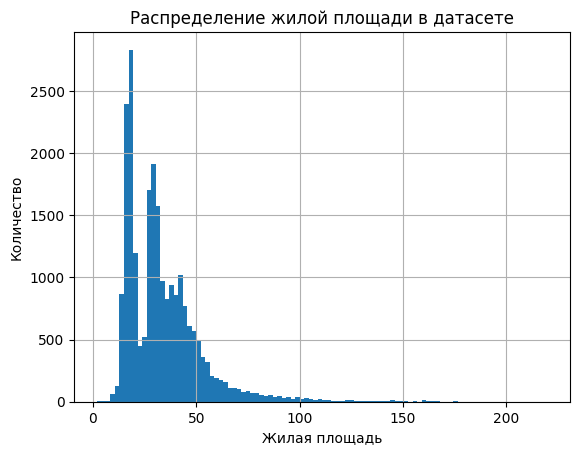

In [48]:
data['living_area'].hist(bins=100)
plt.title('Распределение жилой площади в датасете')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.show()

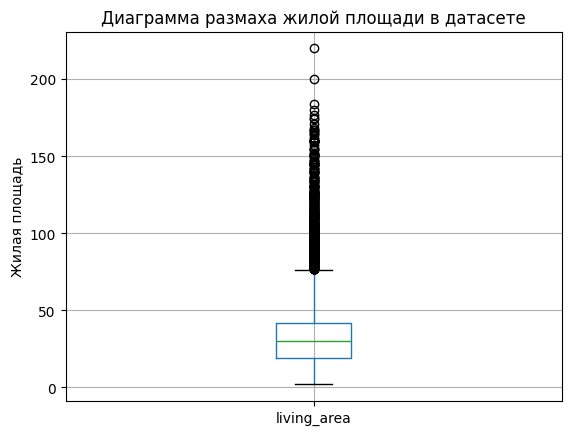

In [49]:
data.boxplot(column='living_area')
plt.title('Диаграмма размаха жилой площади в датасете')
plt.ylabel('Жилая площадь')
plt.show()

Гистограмма показывает, что значений выше 100 м жилой площади очень мало, а диаграмма размаха считает выбросом значения выше примерно 75-80 м.

Так как мы отбросили значения общей площади выше 250 м, то справедливым будет для жилой площади отбросить значения не меньше 150 м.

In [50]:
data = data[(data.living_area > 9) & (data.living_area < 150)]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23272,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23273,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23274,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23275,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


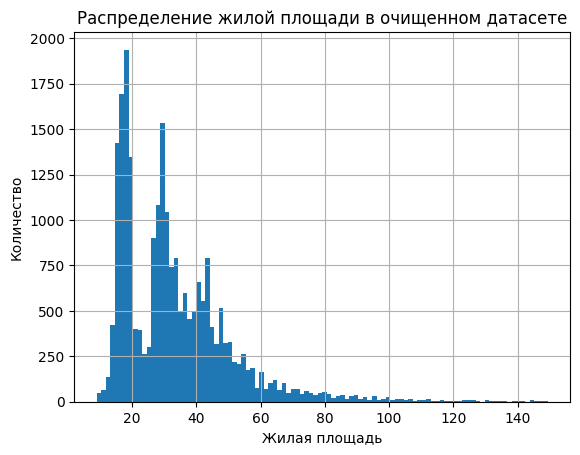

In [51]:
data['living_area'].hist(bins=100)
plt.title('Распределение жилой площади в очищенном датасете')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.show()

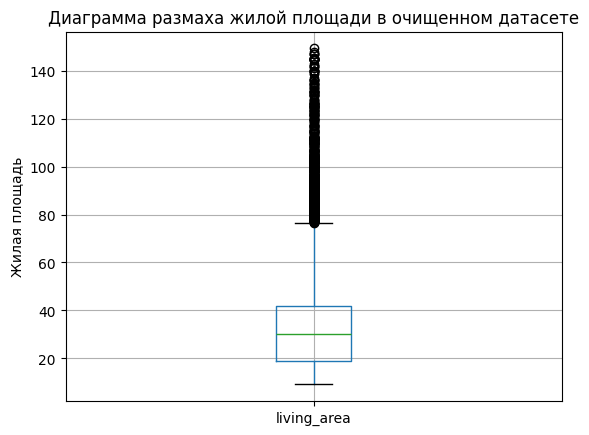

In [52]:
data.boxplot(column='living_area')
plt.title('Диаграмма размаха жилой площади в очищенном датасете')
plt.ylabel('Жилая площадь')
plt.show()

Рассмотрим столбец `kitchen_area`:

In [53]:
data['living_area'].describe()

,living_area
count,23277.000000
mean,33.491604
std,17.778589
min,9.100000
25%,19.000000
50%,30.000000
75%,42.000000
max,149.400000


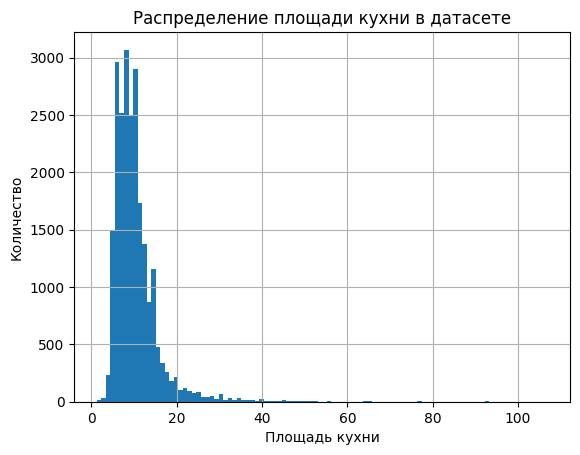

In [54]:
data['kitchen_area'].hist(bins=100)
plt.title('Распределение площади кухни в датасете')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество')
plt.show()

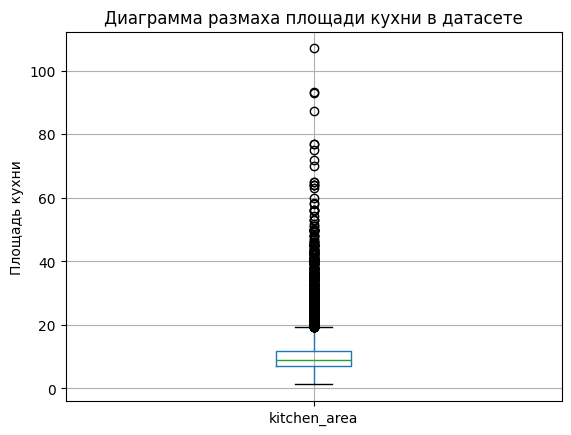

In [55]:
data.boxplot(column='kitchen_area')
plt.title('Диаграмма размаха площади кухни в датасете')
plt.ylabel('Площадь кухни')
plt.show()

Отфильтруем столбец - удалим значения больше 40 метров, так как таких значений очень мало.

In [56]:
data = data[data.kitchen_area < 40]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23153,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23154,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23155,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23156,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


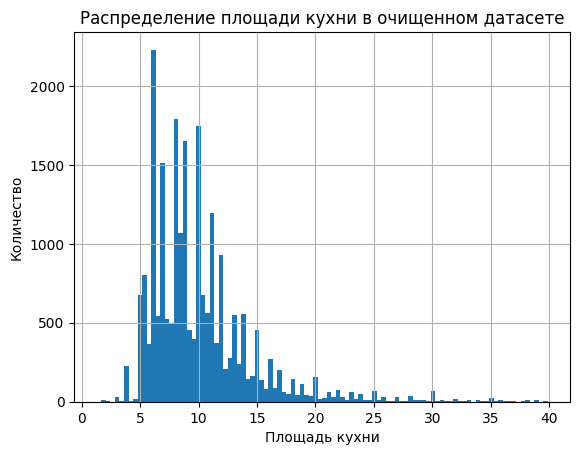

In [57]:
data['kitchen_area'].hist(bins=100)
plt.title('Распределение площади кухни в очищенном датасете')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество')
plt.show()

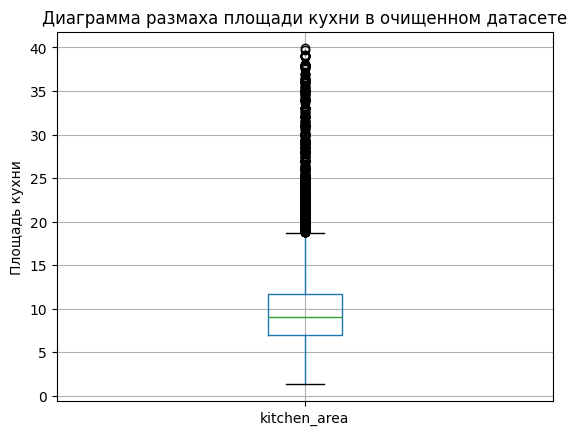

In [58]:
data.boxplot(column='kitchen_area')
plt.title('Диаграмма размаха площади кухни в очищенном датасете')
plt.ylabel('Площадь кухни')
plt.show()

Проверим наличие ошибок в площади: сумма жилой площади и площади кухни не должна превышать общую площадь:

In [59]:
data.query('total_area < living_area + kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
184,7,2600000.0,30.20,2018-02-14,1,2.65,9,26.10,5,True,...,NaN,1.0,824.0,12.0,86092.72,2,2,2018,другой,15.0
421,14,11500000.0,98.00,2016-05-10,3,2.65,3,88.00,3,False,...,NaN,0.0,NaN,90.0,117346.94,1,5,2016,последний,13.0
437,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,True,...,NaN,2.0,982.0,64.0,91479.16,0,3,2018,другой,15.0
541,9,4700000.0,23.80,2018-12-28,1,2.65,18,20.00,9,True,...,NaN,0.0,NaN,108.0,197478.99,4,12,2018,другой,11.0
547,8,3100000.0,31.59,2018-03-08,1,2.70,19,30.55,2,True,...,NaN,NaN,NaN,70.0,98132.32,3,3,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21948,6,2194000.0,36.50,2017-09-27,1,2.65,3,33.20,3,True,...,NaN,2.0,639.0,36.0,60109.59,2,9,2017,последний,18.0
22099,6,3100000.0,27.30,2018-05-29,0,2.70,16,23.30,15,True,...,NaN,0.0,NaN,59.0,113553.11,1,5,2018,другой,9.0
22945,0,5800000.0,66.00,2017-06-09,5,2.65,5,55.50,1,True,...,NaN,0.0,NaN,21.0,87878.79,4,6,2017,первый,11.0
23034,3,1900000.0,18.90,2016-04-04,1,2.65,16,16.00,12,True,...,NaN,NaN,NaN,115.0,100529.10,0,4,2016,другой,NaN


Срез показал, что в датафрейме присутствуют такие 102 строки. Самым простым способом будет избавиться от этих значений, чтобы не исказить данные.

In [60]:
data = data[data.total_area > (data.living_area + data.kitchen_area)]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
22971,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
22972,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
22973,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


Рассмотрим столбец `rooms`:

In [61]:
data['rooms'].describe()

,rooms
count,22975.000000
mean,2.040000
std,1.003785
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,11.000000


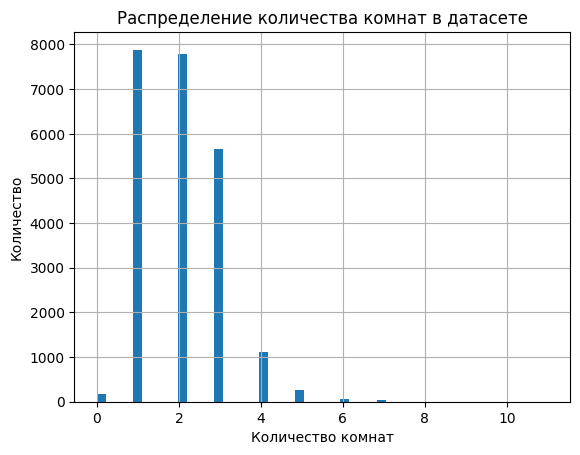

In [62]:
data['rooms'].hist(bins=50)
plt.title('Распределение количества комнат в датасете')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
plt.show()

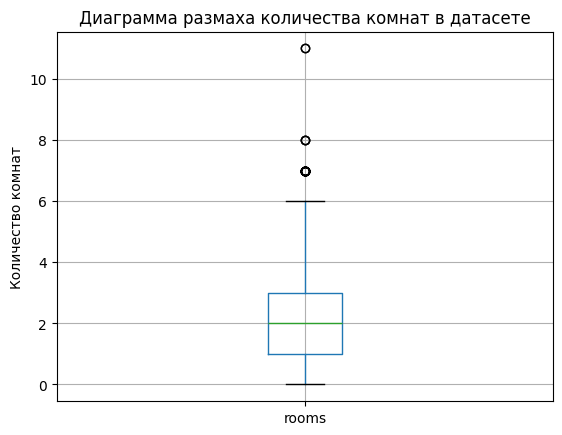

In [63]:
data.boxplot(column='rooms')
plt.title('Диаграмма размаха количества комнат в датасете')
plt.ylabel('Количество комнат')
plt.show()

В данном случае гистограмма и диаграмма размаха практически совпадают - по ним можно сделать вывод, что квартиры с число комнат больше 6 - выбросы. Также следует отсеить квартиры с 0 комнатами, так как даже квартиры-студии фактически имеют 1 комнату.

In [64]:
data = data[(data['rooms'] > 0) & (data['rooms'] <= 6)]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22765,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
22766,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
22767,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
22768,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


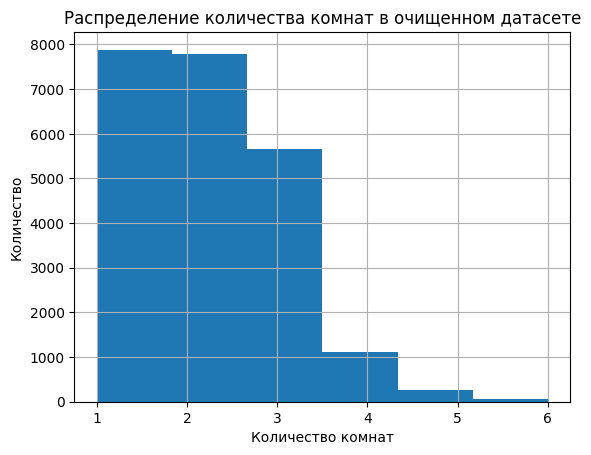

In [65]:
data['rooms'].hist(bins=6)
plt.title('Распределение количества комнат в очищенном датасете')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
plt.show()

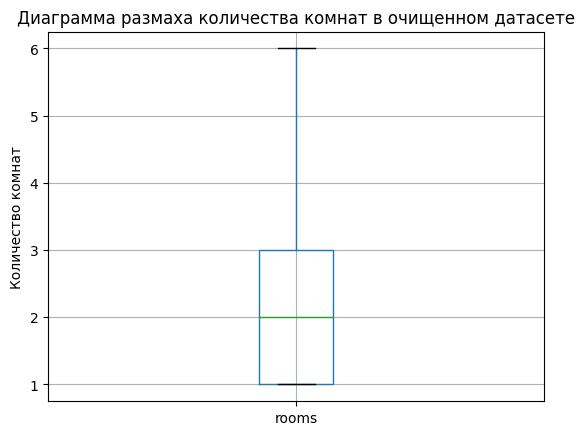

In [66]:
data.boxplot(column='rooms')
plt.title('Диаграмма размаха количества комнат в очищенном датасете')
plt.ylabel('Количество комнат')
plt.show()

Рассмотрим столбец `floors_total`:

In [67]:
data['floors_total'].describe()

,floors_total
count,22770.000000
mean,10.677075
std,6.567750
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,60.000000


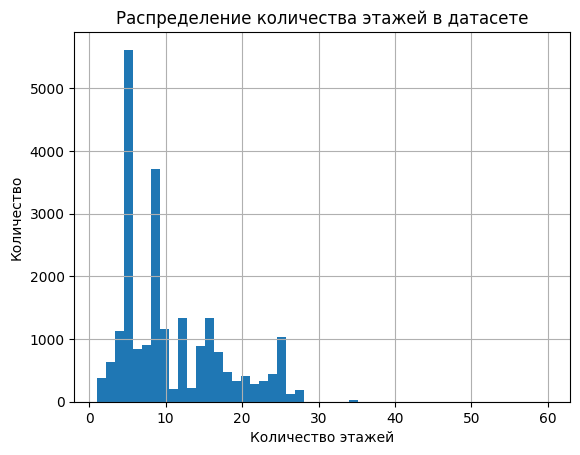

In [68]:
data['floors_total'].hist(bins=50)
plt.title('Распределение количества этажей в датасете')
plt.xlabel('Количество этажей')
plt.ylabel('Количество')
plt.show()

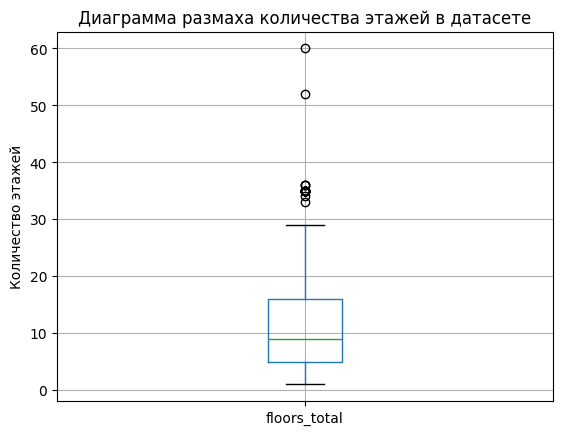

In [69]:
data.boxplot(column='floors_total')
plt.title('Диаграмма размаха количества этажей в датасете')
plt.ylabel('Количество этажей')
plt.show()

По диаграмме размаха видно, что ЖК выше 29 этажей можно принять за выбросы, однако, согласно результатам поиска в интернете, самое высокое жилое здание в СПб - 37 этажей.

При анализе, будет отталкиваться от этого значения.

Выведем его:

In [70]:
data.query('floors_total == 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter


В датафрейме нет информации об этом жилом комплексе, значит от остальных значений выше 29 этажей можно избавиться.

In [71]:
data = data[data.floors_total <= 29]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
22738,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
22739,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
22740,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


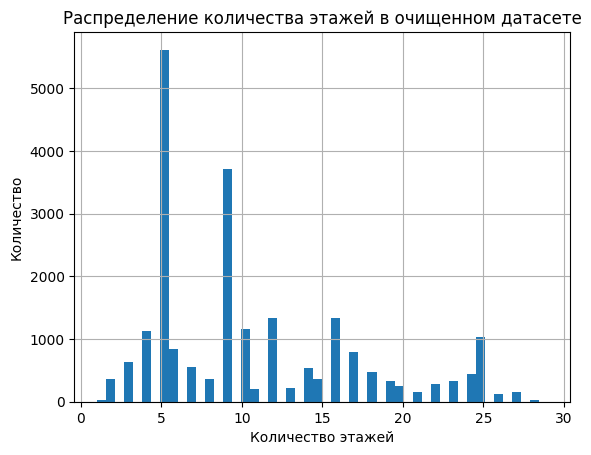

In [72]:
data['floors_total'].hist(bins=50)
plt.title('Распределение количества этажей в очищенном датасете')
plt.xlabel('Количество этажей')
plt.ylabel('Количество')
plt.show()

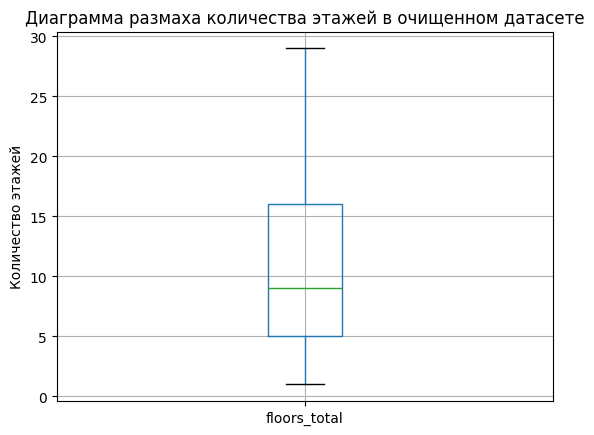

In [73]:
data.boxplot(column='floors_total')
plt.title('Диаграмма размаха количества этажей в очищенном датасете')
plt.ylabel('Количество этажей')
plt.show()

Рассмотрим столбец `last_price`:

In [74]:
data['last_price'].describe()

,last_price
count,2.274200e+04
mean,5.976806e+06
std,5.935955e+06
min,4.300000e+05
25%,3.433625e+06
50%,4.600000e+06
75%,6.650000e+06
max,2.892384e+08


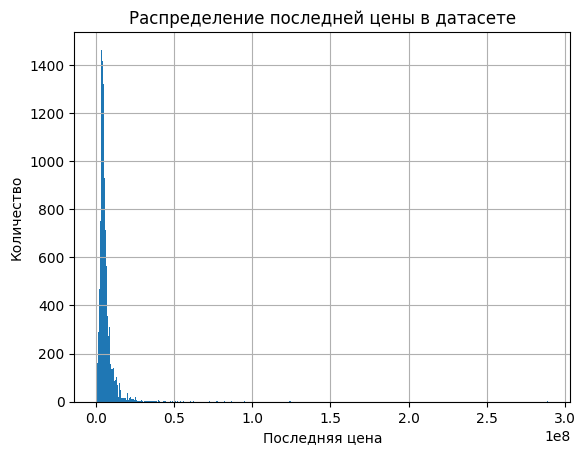

In [75]:
data['last_price'].hist(bins=1000)
plt.title('Распределение последней цены в датасете')
plt.xlabel('Последняя цена')
plt.ylabel('Количество')
plt.show()

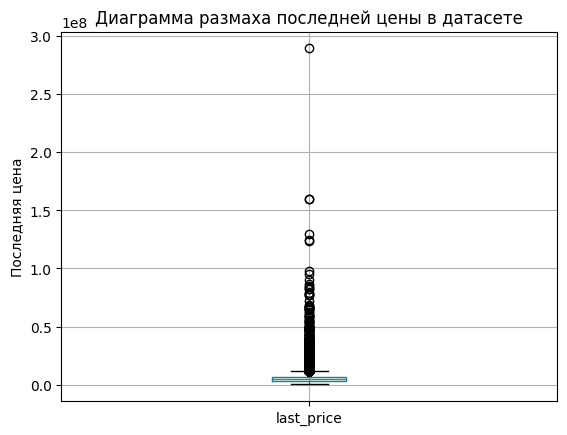

In [76]:
data.boxplot(column='last_price')
plt.title('Диаграмма размаха последней цены в датасете')
plt.ylabel('Последняя цена')
plt.show()

Избавимся от значений выше 100000000, так как, судя по диаграмме размаха, до этой отметки значения идут довольно плотно, а все, что выше - редкие выбросы.

Мы не можем удалить значения по границе нормальных значений, так как такая стоимость квартир вполне реальна в элитных районах города.

In [77]:
data = data[data.last_price < 100000000]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22731,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
22732,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
22733,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
22734,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


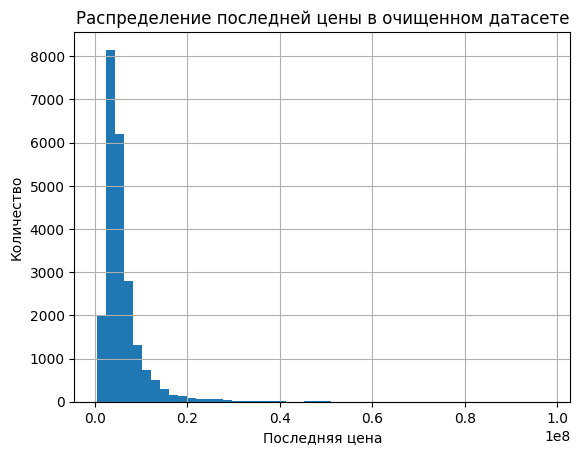

In [78]:
data['last_price'].hist(bins=50)
plt.title('Распределение последней цены в очищенном датасете')
plt.xlabel('Последняя цена')
plt.ylabel('Количество')
plt.show()

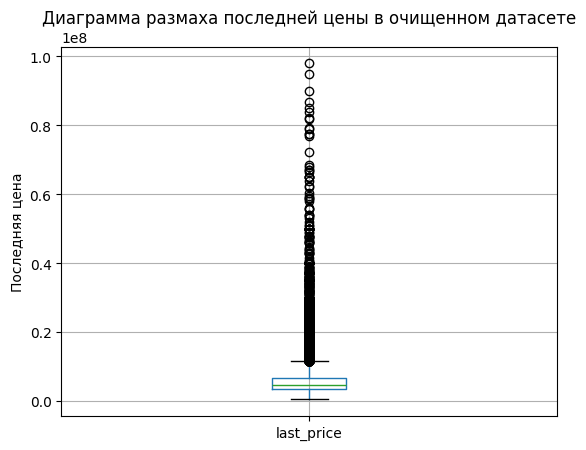

In [79]:
data.boxplot(column='last_price')
plt.title('Диаграмма размаха последней цены в очищенном датасете')
plt.ylabel('Последняя цена')
plt.show()

Рассмотрим столбец `cityCenters_nearest`:

In [80]:
data['cityCenters_nearest'].describe()

,cityCenters_nearest
count,17402.000000
mean,14348.858982
std,8617.671952
min,181.000000
25%,9508.000000
50%,13168.000000
75%,16342.250000
max,65968.000000


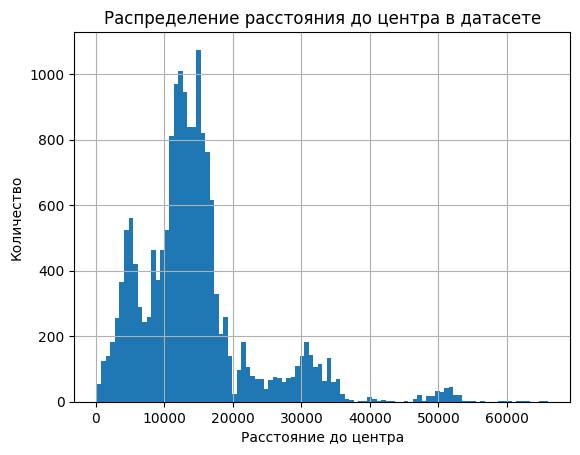

In [81]:
data['cityCenters_nearest'].hist(bins=100)
plt.title('Распределение расстояния до центра в датасете')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество')
plt.show()

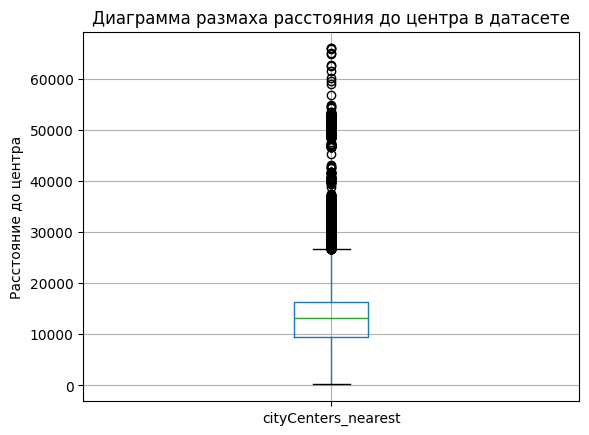

In [82]:
data.boxplot(column='cityCenters_nearest')
plt.title('Диаграмма размаха расстояния до центра в датасете')
plt.ylabel('Расстояние до центра')
plt.show()

Диаграмма размаха считает выбросами значения выше 25000 метров.

Несмотря на то, что это довольно грубый метод отсивания значений, воспользуемся им, так как сложно адекватно оценить какие данные выбросы, какие - нет.

In [83]:
data = data[(data.cityCenters_nearest.isna()) | (data.cityCenters_nearest < 25000)]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20841,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
20842,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
20843,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
20844,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


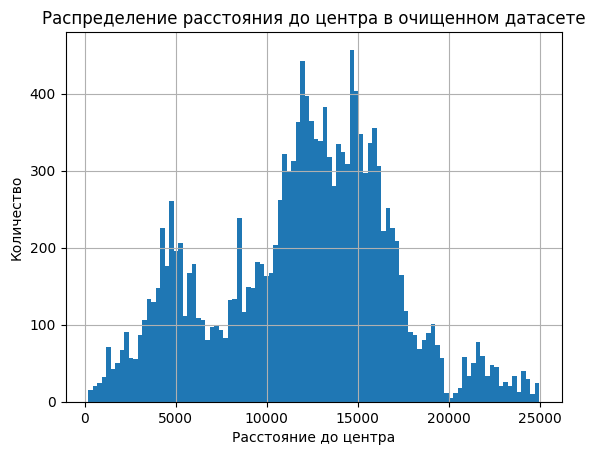

In [84]:
data['cityCenters_nearest'].hist(bins=100)
plt.title('Распределение расстояния до центра в очищенном датасете')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество')
plt.show()

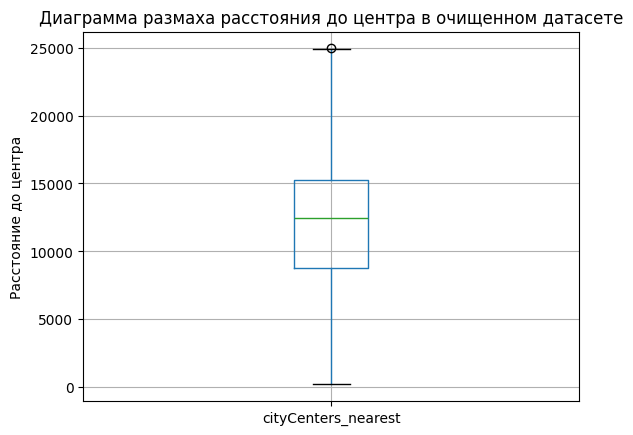

In [85]:
data.boxplot(column='cityCenters_nearest')
plt.title('Диаграмма размаха расстояния до центра в очищенном датасете')
plt.ylabel('Расстояние до центра')
plt.show()

Рассмотрим столбец `parks_nearest`:

In [86]:
data['parks_nearest'].describe()

,parks_nearest
count,6914.000000
mean,501.720133
std,345.032987
min,1.000000
25%,302.000000
50%,464.000000
75%,623.000000
max,3190.000000


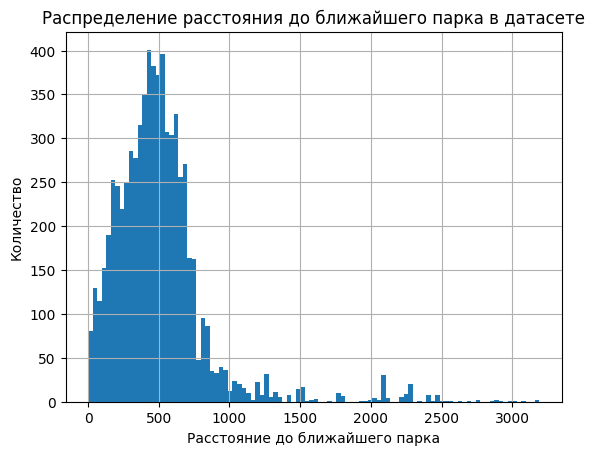

In [87]:
data['parks_nearest'].hist(bins=100)
plt.title('Распределение расстояния до ближайшего парка в датасете')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество')
plt.show()

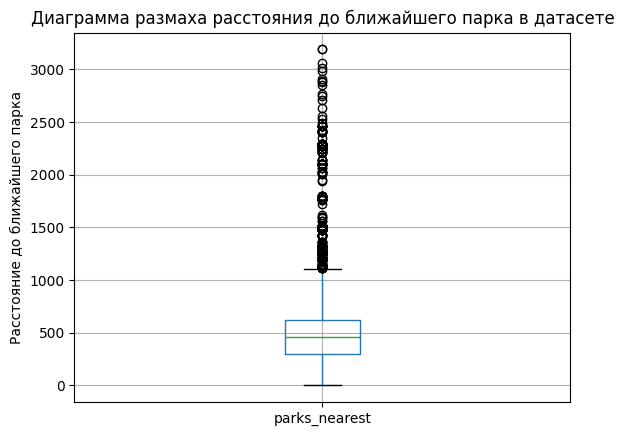

In [88]:
data.boxplot(column='parks_nearest')
plt.title('Диаграмма размаха расстояния до ближайшего парка в датасете')
plt.ylabel('Расстояние до ближайшего парка')
plt.show()

По аналогии рассмотрим расстояния до парков: диаграмма размаха считает выбросами значения выше примерно 1050 метров.

Несмотря на то, что это довольно грубый метод отсивания значений, воспользуемся им, так как сложно адекватно оценить какие данные выбросы, какие - нет.

In [89]:
data = data[(data.parks_nearest.isna()) | (data.parks_nearest < 1050)]
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20531,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
20532,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
20533,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
20534,13,11475000.0,76.75,2017-03-28,2,3.00,17,44.0,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


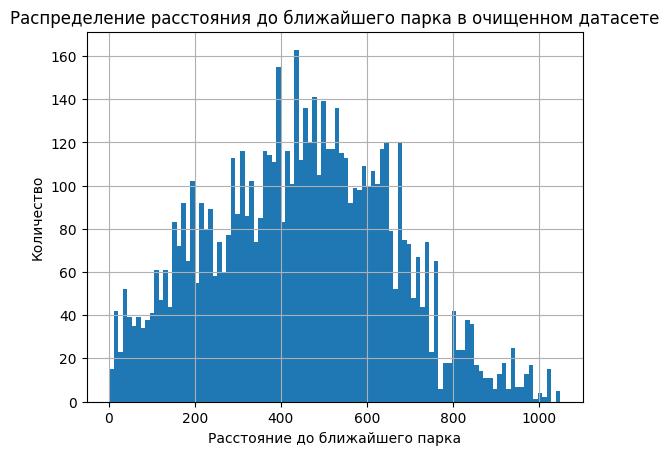

In [90]:
data['parks_nearest'].hist(bins=100)
plt.title('Распределение расстояния до ближайшего парка в очищенном датасете')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество')
plt.show()

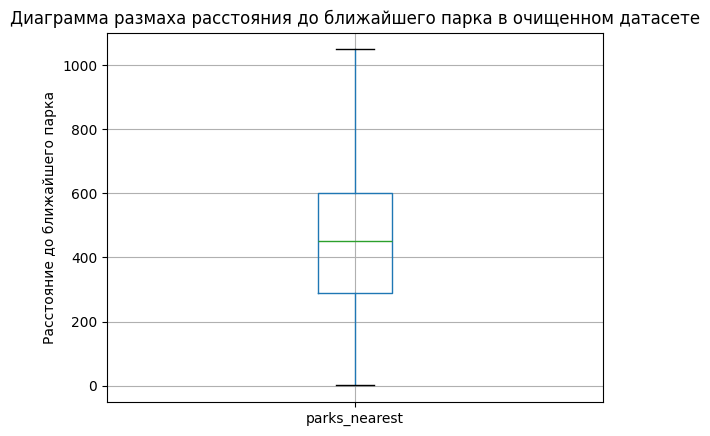

In [91]:
data.boxplot(column='parks_nearest')
plt.title('Диаграмма размаха расстояния до ближайшего парка в очищенном датасете')
plt.ylabel('Расстояние до ближайшего парка')
plt.show()

Выведем финальные данные:

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20536 entries, 0 to 23537
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            20536 non-null  int64         
 1   last_price              20536 non-null  float64       
 2   total_area              20536 non-null  float64       
 3   first_day_exposition    20536 non-null  datetime64[ns]
 4   rooms                   20536 non-null  int64         
 5   ceiling_height          20536 non-null  float64       
 6   floors_total            20536 non-null  int64         
 7   living_area             20536 non-null  float64       
 8   floor                   20536 non-null  int64         
 9   is_apartment            20536 non-null  bool          
 10  studio                  20536 non-null  bool          
 11  open_plan               20536 non-null  bool          
 12  kitchen_area            20536 non-null  float64    

In [93]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
is_apartment,0


**Вывод:**

В результате предобработки были:
1. изменены типы данных, так как в исходном датафрейме содержались ошибки;
2. проанализированы и устранены пропуски в столбцах, там, где это возможно;
3. устранены дубликаты и аномалии в данных - при каждом анализе аномалий построены гистограммы и диаграммы размаха, а на их основе принято решение от каких значений избавляться;
4. добавлены новые столбцы для последующего анализа.

## Построение и анализ зависимостей

### Скорость продажи квартиры

Построим гистограмму:

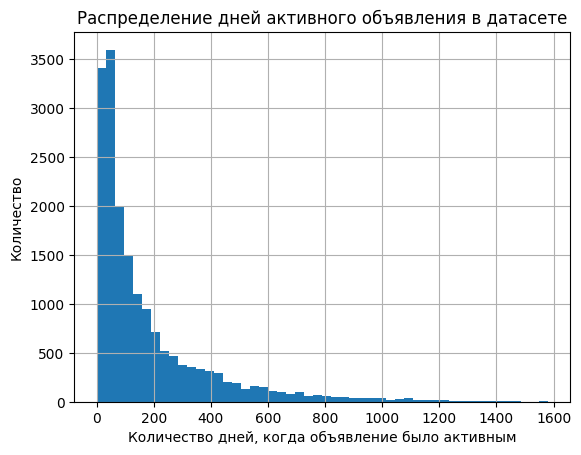

In [94]:
data['days_exposition'].hist(bins=50)
plt.title('Распределение дней активного объявления в датасете')
plt.xlabel('Количество дней, когда объявление было активным')
plt.ylabel('Количество')
plt.show()

Построим диаграмму размаха:

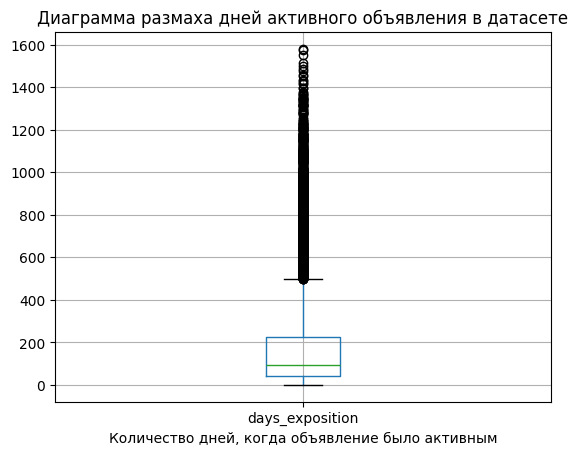

In [95]:
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха дней активного объявления в датасете')
plt.xlabel('Количество дней, когда объявление было активным')
plt.show()

In [96]:
data['days_exposition'].describe()

,days_exposition
count,17781.000000
mean,178.568303
std,217.500393
min,1.000000
25%,44.000000
50%,93.000000
75%,226.000000
max,1580.000000


**Вывод**

Из описания данных следует, что среднее значение продажи квартиры - 178 дней, медиана - 93 дня.

Судя по диаграмме размаха, выбросами считаются объявления, которые продаются примерно 500 дней и больше.

Быстрым продажами можно считать те продажи, что вошли в первый квантиль, то есть которые были проданы в течение 44 дней - таких объявлений большинство.

### Влияние факторов на стоимость квартиры

Оценим влияние общей площади на конечную цену объекта:

In [97]:
data['total_area'].corr(data['last_price'])

0.7364494411477309

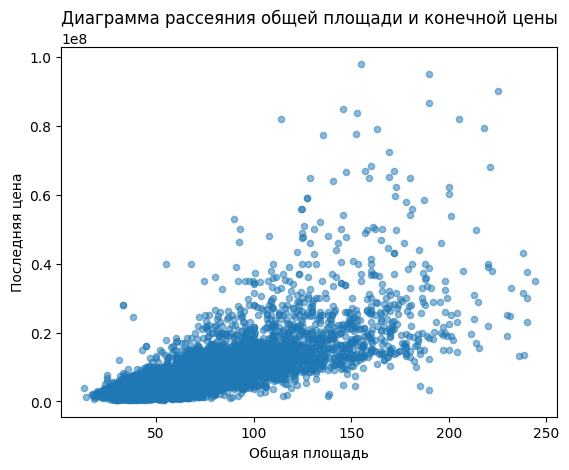

In [98]:
data.plot(
    x='total_area',
    y='last_price',
    kind='scatter',
    alpha=0.5
    )
plt.title('Диаграмма рассеяния общей площади и конечной цены')
plt.xlabel('Общая площадь')
plt.ylabel('Последняя цена')
plt.show()

Оценим влияние жилой площади на конечную цену объекта:

In [99]:
data['living_area'].corr(data['last_price'])

0.6495217008666557

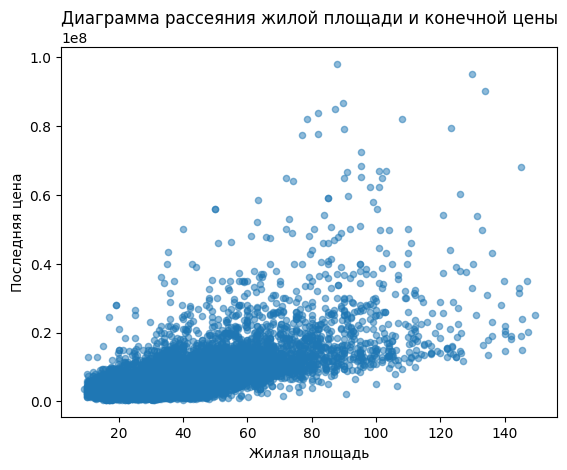

In [100]:
data.plot(
    x='living_area',
    y='last_price',
    kind='scatter',
    alpha=0.5
    )
plt.title('Диаграмма рассеяния жилой площади и конечной цены')
plt.xlabel('Жилая площадь')
plt.ylabel('Последняя цена')
plt.show()

Оценим влияние площади кухни на конечную цену объекта:

In [101]:
data['kitchen_area'].corr(data['last_price'])

0.5526321921183793

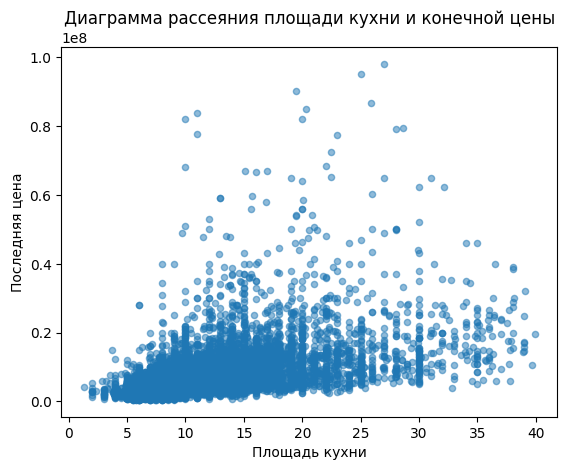

In [102]:
data.plot(
    x='kitchen_area',
    y='last_price',
    kind='scatter',
    alpha=0.5
    )
plt.title('Диаграмма рассеяния площади кухни и конечной цены')
plt.xlabel('Площадь кухни')
plt.ylabel('Последняя цена')
plt.show()

**Вывод**

Зависимость оценивалась с помощью коэффициента корреляции и диаграмм рассеивания.

При анализе столбцов можно проследить прямую зависимость увеличения цены от общей площади, а также от жилой площади и площади квартиры.

Коэффициент корреляции ярко выражен при исследовании зависимости цены от общей площади (k=0.74), что говорит о сильной взаимосвязи.

Слабая, но все же она есть, взаимосвязь площади кухни и цены - это можно объяснить тем, что покупатель при выборе квартиры в первую очередь смотрит на жилую площадь.

Рассмотрим влияние типа этажа на цену объекта:

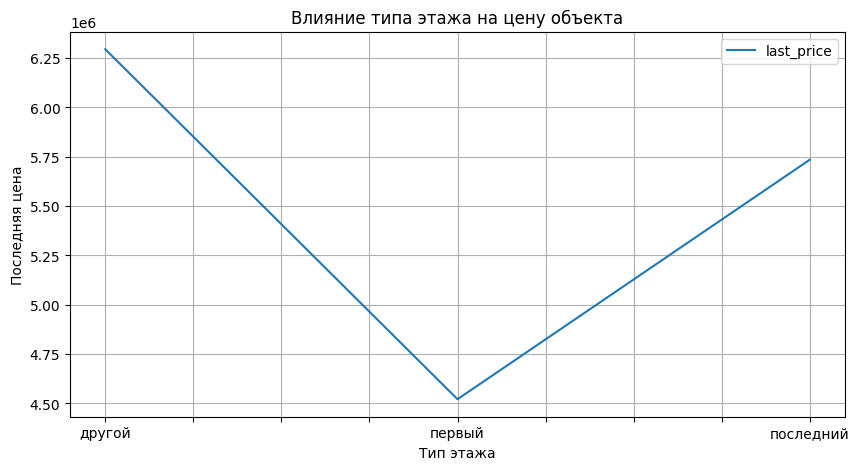

In [103]:
data_price_of_total_area = data.pivot_table(
    index='floors_type',
    values='last_price'
    )
data_price_of_total_area.sort_values(by='floors_type', ascending=False)
data_price_of_total_area.plot(figsize=(10, 5), grid=True)
plt.title('Влияние типа этажа на цену объекта')
plt.xlabel('Тип этажа')
plt.ylabel('Последняя цена')
plt.show()

**Вывод**

При анализе столбца `floors_type` можно увидеть, что самыми дешевыми квартирами являются квартиры на первом этаже.

Это логично и коррелирует с реальностью - в квартиры на первом этаже происходят чаще кражи, также они считаются более грязными и шумными квартирами, так как вся пыль с улицы летит в окна.

Также можно увидеть, что квартиры на последнем этаже тоже не самые дорогие. Связано это с тем, что там могут возникать проблемы с отоплением, лифтом.

Рассмотрим влияние дня недели, когда было выложено объявление, на цену объекта:

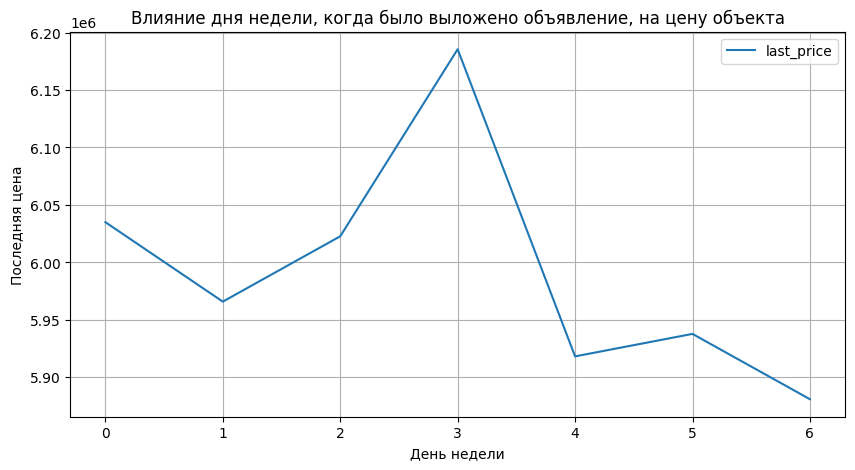

In [104]:
data_price_of_total_area = data.pivot_table(
    index='weekday',
    values='last_price'
    )
data_price_of_total_area.sort_values(by='weekday', ascending=False)
data_price_of_total_area.plot(figsize=(10, 5), grid=True)
plt.title('Влияние дня недели, когда было выложено объявление, на цену объекта')
plt.xlabel('День недели')
plt.ylabel('Последняя цена')
plt.show()

Рассмотрим влияние месяца, когда было выложено объявление, на цену объекта:

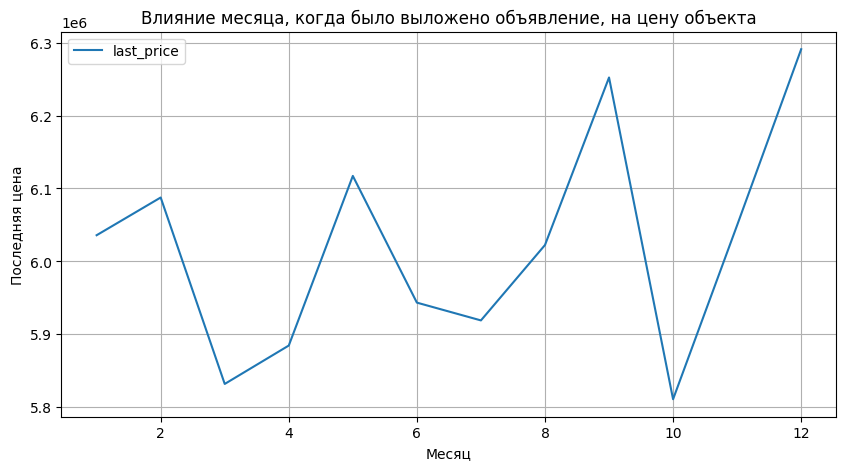

In [105]:
data_price_of_total_area = data.pivot_table(
    index='month',
    values='last_price'
    )
data_price_of_total_area.sort_values(by='month', ascending=False)
data_price_of_total_area.plot(figsize=(10, 5), grid=True)
plt.title('Влияние месяца, когда было выложено объявление, на цену объекта')
plt.xlabel('Месяц')
plt.ylabel('Последняя цена')
plt.show()

Рассмотрим влияние года, когда было выложено объявление, на цену объекта:

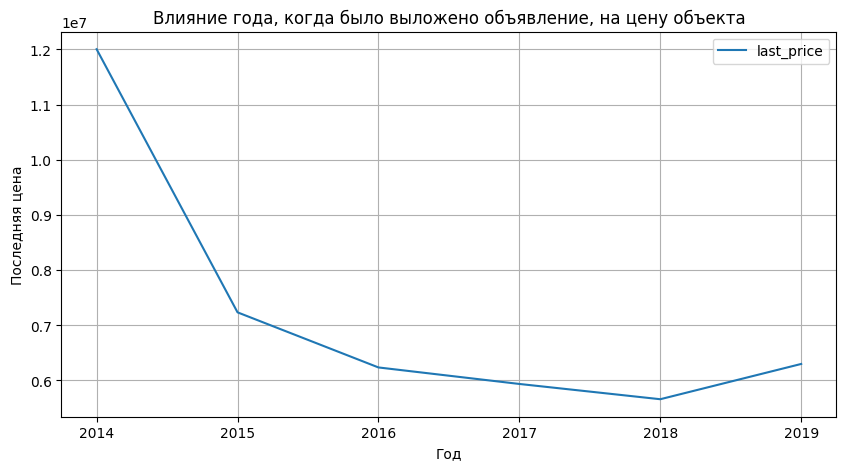

In [106]:
data_price_of_total_area = data.pivot_table(
    index='year',
    values='last_price'
    )
data_price_of_total_area.sort_values(by='year', ascending=False)
data_price_of_total_area.plot(figsize=(10, 5), grid=True)
plt.title('Влияние года, когда было выложено объявление, на цену объекта')
plt.xlabel('Год')
plt.ylabel('Последняя цена')
plt.show()

**Вывод**

На основе полученных результатов можно сделать вывод, что размещать объявление лучше в середине недели, а в выходные лучше этого не делать.

Также не рекомендуется размещать объявление летом, так как с июня по август проседает средняя стоимость. Наилучшем же временем будет май, сентябрь и декабрь.

По годам можно сделать только один вывод - после обвала рубля в 2014 году, цены на жилье резко упали, так как упал и спрос.

### Расчет средней стомости квадратного метра для наиболее популярных населенных пунктов

Найдем топ-10 населенных пунктов и добавим их в переменную `data_most`:

In [107]:
data_most = data['locality_name'].value_counts().head(10)
data_most

,count
locality_name,
Санкт-Петербург,14632
Мурино,550
Кудрово,443
Всеволожск,381
Парголово,321
Гатчина,302
Шушары,248
Выборг,230
Новое Девяткино,141


Сделаем срез, в котором будут только топ-10 населенных пунктов:

In [108]:
data_most_list = data_most.head(10).index
data_mean_price = data.query('locality_name in @data_most_list')
data_mean_price

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_type,distance_to_citycenter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.6,6,True,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23528,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,True,...,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0
23529,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,True,...,300.0,0.0,NaN,15.0,105769.23,3,7,2018,другой,6.0
23530,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.0
23533,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0


Найдем среднюю стоимость за метр квадратный для каждого населенного пункта из топ-10:

In [109]:
data_mean_price_pivot = data_mean_price.pivot_table(
    index='locality_name',
    values='price_per_square_meter',
    aggfunc='mean'
    )
data_mean_price_pivot.sort_values(by='price_per_square_meter', ascending=False)

,price_per_square_meter
locality_name,
Санкт-Петербург,112184.177159
Кудрово,95045.510993
Парголово,90407.798380
Мурино,85339.667309
Шушары,80202.745766
Новое Девяткино,75857.245461
Сертолово,68901.699783
Гатчина,68678.929868
Всеволожск,68543.772388


**Вывод**

Из полученных данных видно, что самые дорогие квартиры по цене за квадратный метр продаются в Санкт-Петербурге, а самые дешевые - в Выборге.

### Влияние стоимости квартиры от расстояния до центра

Построим зависимость цены от удаленности до центра города:

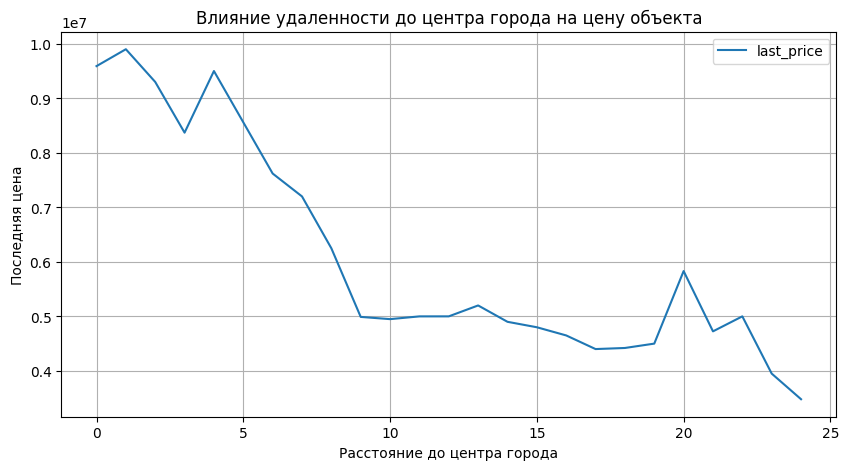

In [110]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_price_of_total_area = data_spb.pivot_table(
    index='distance_to_citycenter',
    values='last_price',
    aggfunc='median'
    )
data_price_of_total_area.sort_values(by='distance_to_citycenter', ascending=False)
data_price_of_total_area.plot(figsize=(10, 5), grid=True)
plt.title('Влияние удаленности до центра города на цену объекта')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Последняя цена')
plt.show()

**Вывод**

Анализируя зависимость цены от удаленности до центра города, видно, что тут прямая зависимость - чем дальше от центра, тем дешевле квартира.

## Общий вывод



В данной проектной работе было проведено исследование о влиянии различных факторов на стоимость жилья.

На стадии предобработки данных были обнаружены следующие проблемы в датасете:
1. в столбцах `first_day_exposition`, `is_apartment` неверный тип данных - object вместо bool, в столбцах `floors_total`, `balcony` тип даных float вместо int;
2. в большей части столбцов пропущены значения;
3. в некоторых столбцах обнаружены аномальные значения, которые не соответствуют действительности.

Типы данных были заменены методом `astype()`. Там, где это возможно, пропуски были заменены вручную исходя из логики или заменены медианным значением. Аномальные значения были либо устранены, либо удалены, если набор выбросов не превышал 5% данных.

Также была выполнена категоризация этажности квартир - были отдельно выделены квартиры на первом, последнем и остальных этажах для последующего анализа, и добавлены столбцы, требующиеся для дальнейшего расчета - так, были добавлены столбцы с ценой за квадратный метр, в какой день / месяц / год было выложено объявление и с расстоянием до центра города в километрах.

Основной целью исследования была задача ответить на вопрос что влияет на продажу объекта. Для этого были проведены четыре исследования:

1. Сначала была определена скорость продажи квартиры - в среднем на это уходит 178 дней, медианное значение 93 дня. Для этого использовался метод describe() и построены гистограмма и диаграмма размаха;

2. Затем исследовались различные факторы, влияющие на стоимость жилья. Данное исследование можно разбить на группы: влияние площади на стоимость, влияние этажности на стоимость и влиние дня, месяца и года на стоимость.
В результате этих исследований можно сделать вывод, что общая, жилая и кухонная площадь напрямую влияют на стомость объекта. Для этого были построеные диаграммы рассеивания и посчитаны коэффициенты корреляции. Прослеживается четкая связь, так как коэффициенты варьируются от 0.55 (зависимость цены от кухонной площади) до 0.74 (зависимость цены от общей площади). График влияния этажности на цену показал, что квартиры на первом этаже самые дешевые, так как они считаются наименее безопасными, и на более шумными и грязными. Квартиру на продажу лучше выставлять либо в конце года, либо в сентябре, когда большинство людей вернулось с отпусков, так как в это время график показал наибольшие значения цены;

3. Третье исследование направлено на выявление стоимости за квадратный метр для наиболее популярных районов. По итогу анализу выяснилось, что самое дорогое с отрывом жилье в Санкт-Петербурге (112 тыс. рублей за кв. метр), дешевле всего квартиры в Выборге (58 тыс. рублей за кв. метр);

4. Последней задачей было выявить зависимость стоимости жилья от удаленности от центра. В данном случае наблюдается прямая зависимость, так как исторический центр любого города является красивым и престижным местом.